In [1]:
import sys
sys.path.append('/public/src')
from factor_evaluation_server import FactorEvaluation,DataService # type: ignore
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import pandas_ta as ta

In [2]:
ds=DataService()
df=ds['ETHUSDT_15m_2020_2025']['2021-10-01':]

In [3]:
# 添加缺失的vwap字段（如果未提供）
if 'vwap' not in df.columns:
    df['vwap'] = df['turnover'] / df['volume']

In [4]:
evaluator=FactorEvaluation(df=df,future_return_periods=10)

# 定义因子！

In [ ]:
def calculate_kup1_ma(df):
    """
    计算结合移动平均线的KUP1因子
    
    趋势调整使因子更具方向性，头部组（上影线长且在上升趋势）收益可能更正，尾部组（上影线短或下降趋势）收益更负。
    """
    # 计算短期和长期MA
    df['short_ma'] = df['close'].rolling(window=10).mean()
    df['long_ma'] = df['close'].rolling(window=30).mean()
    
    # 计算KUP1
    max_open_close = np.maximum(df['open'], df['close'])
    upper_shadow = df['high'] - max_open_close
    kup1 = upper_shadow / df['open']
    
    # 判断趋势：短期MA > 长期MA为上升趋势
    trend = np.where(df['short_ma'] > df['long_ma'], 1, -1)
    
    # 结合趋势调整KUP1因子
    kup1_adjusted = kup1 * trend
    
    return kup1_adjusted

# 因子测试

In [6]:
evaluator.set_factor(
    factor_data_or_func=calculate_kup1_ma,
    factor_name='calculate_kup1_ma'
)


📊 单币种 (single) 详细评估结果:
--------------------------------------------------
🔗 相关性分析:
   IC (Pearson): -0.003609
   Rank_IC (Spearman): -0.025886
📊 信息比率:
   IR: -0.411650
   有效分组数: 10
📊 因子分布:
📋 数据概况:
   数据长度: 130716
   因子列: calculate_kup1_ma
   收益率列: future_return
   未来收益周期: 10
--------------------------------------------------

🖼️  单币种 (single) 图片展示:
----------------------------------------
📊 显示分组分析图...


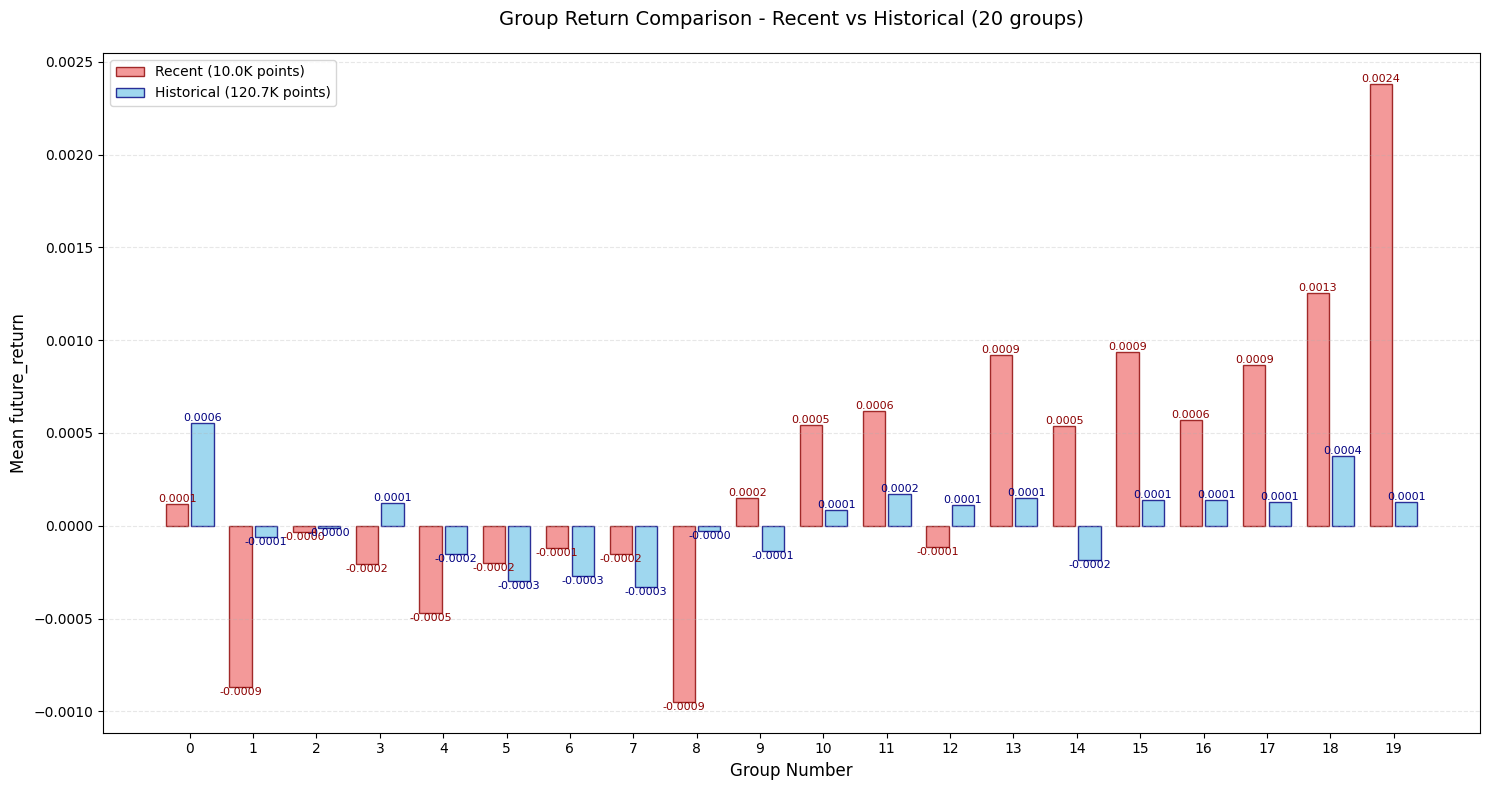

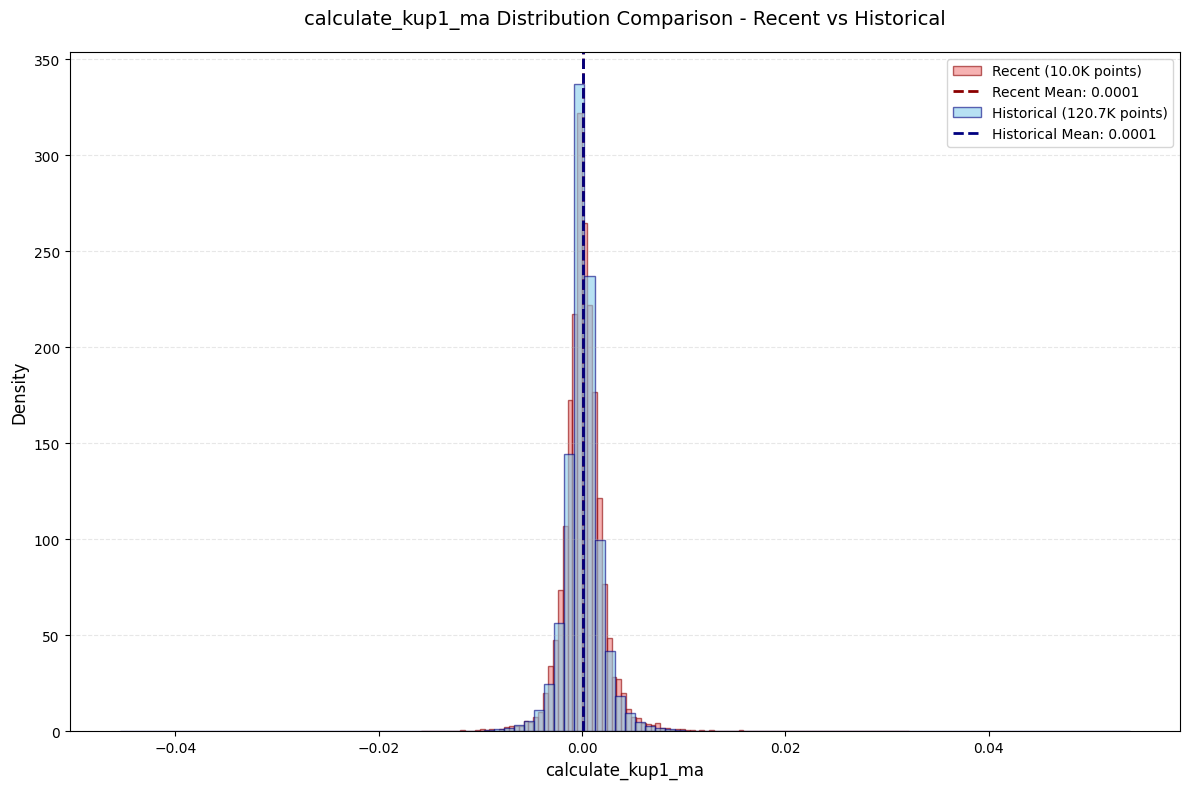

📈 显示因子分布图...
✅ 已显示 2 个图片
----------------------------------------


In [7]:
result=evaluator.run_full_evaluation(run_stationarity_test=False)